In [567]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [568]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# !wget $data -O data-week-3.csv 


In [569]:
df = pd.read_csv('data-week-3.csv')
df.head()
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [570]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [571]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


df.totalcharges

In [572]:
# cast str value to int and replcae unparsable ones with NaN
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [573]:
df.totalcharges =  pd.to_numeric(df.totalcharges, errors='coerce')

In [574]:
df.totalcharges = df.totalcharges.fillna(0)

In [575]:
df.churn.head()
# Change yes/no to numeric variables
df.churn = (df.churn == 'yes').astype(int)

In [576]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# Set up validation fremework

In [577]:
from sklearn.model_selection import train_test_split

In [578]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [579]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [580]:
len(df_full_train), len(df_test)

(5634, 1409)

In [581]:
# get 0.25 of full_train, as that results in 0.2 of original df
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [582]:
len(df_train), len(df_val),len(df_test)


(4225, 1409, 1409)

In [583]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [584]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [585]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]


# Exploratory data analysis
- chekc missing vals
- look at target var (churn)
- look at categorical and numerical cols

In [586]:
df_full_train = df_full_train.reset_index(drop=True)

In [587]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [588]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [589]:
# Reason mean() gives churn rate as mean takes into account only the "ones count" - if churned - data has 1, so mean shows churn rate
df_full_train.churn.mean()

0.26996805111821087

In [590]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [591]:

df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [592]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [593]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [594]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature improtance: churn rate and risk ration
- identifying which features affect our target variable - churn
- churn rate
- risk ratio
- mutual information
- 

In [595]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [596]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [597]:
# ^^ for gender non significant differences
global_churn_rate

0.26996805111821087

In [598]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [599]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner


0.3298090040927694

In [600]:
# for partner/no partner - significant indicator

In [601]:
# difference
# global - group
# <0 more likely  to churn | 0> less likely to churn

In [602]:
# risk ratio
# risk = group / global
# > 1 more likely to churn | <1 less likely to churn

In [603]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [607]:
# agg returns df, not series like mean()
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [ ]:
from IPython.display import display

In [608]:
for c in categorical:
    # agg returns df, not series like mean()
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()


gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Feature importance: mutual information
Mutual information - concept from information theory.

It tells how much we can learrn about one variable if we know the value of another.

In [610]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [611]:
# knowing person's 'gender' tells us nothing about whether they are going to churn
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [612]:
# knowing person's 'contract' we know if person is at high churn risk
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [618]:
# wrapper because apply only allows for one argument
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

# check mutual info score for each categorical variable against churn
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature importance: Correlation
 Pearsons correlation | Correlation coeafficient

 Measures the degree of dependency between two variables     

negative correlation - one grows, other decreases
positive = one grows, other grows

measure
- 0.0 ... 0.2 (and vice versa for negative -0.2) -= LOW (rarely)
- 0.2 ... 0.5 (and vice versa for negative -0.5) -= MODERATE (sometimes)
- 0.6 ... 1.0 (and vice versa for negative -1.0) -= STRONG (almost always)


In [619]:
df_full_train.tenure.max()

72

In [620]:
df_full_train[numerical].corrwith(df_full_train.churn)
# tenure           -0.351885
# monthlycharges    0.196805
# totalcharges     -0.196353

# Longer tenure - less likely to churn
# The higher monthly charges - MORE likely to churn
# The more people pay - less likely to leave 


tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

### check for tenure (NEGATIVE corr)

In [622]:
df_full_train[
    df_full_train.tenure <= 2
].churn.mean()

0.5953420669577875

In [624]:
df_full_train[
    (df_full_train.tenure > 2)
    & (df_full_train.tenure <= 12)
].churn.mean()

0.3994413407821229

In [626]:
df_full_train[
    df_full_train.tenure > 12
].churn.mean()

0.17634908339788277

### check for monthlycharges (POSITIVE corr)

In [627]:
df_full_train[
    df_full_train.monthlycharges <= 20
].churn.mean()

0.08795411089866156

In [628]:
df_full_train[
    (df_full_train.monthlycharges > 20)
    & (df_full_train.monthlycharges <= 50)
].churn.mean()

0.18340943683409436

In [630]:
df_full_train[
    df_full_train.monthlycharges > 50
].churn.mean()

0.32499341585462205

In [631]:
# can jus tcheck importance, iwthout looking at direction with 'abs()'abs
df_full_train[numerical].corrwith(df_full_train.churn).abs()


tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# One-hot encoding
- use scikit-learn to encoide categorical variables

In [646]:
from sklearn.feature_extraction import DictVectorizer
df_train[['gender', 'contract', 'tenure']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [665]:
# no transofmration is  added for a numerical variable
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [666]:
dv = DictVectorizer(sparse=False)

In [667]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [677]:

list(dv.transform(train_dicts[:5][0]))

[array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])]

In [678]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [680]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [681]:
# We dont fit on VALIDATION dataset - only on train
X_val = dv.transform(val_dicts)

# Logistic regression
- binary classification ()
- linear vs logistic regression

In [683]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [687]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [688]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

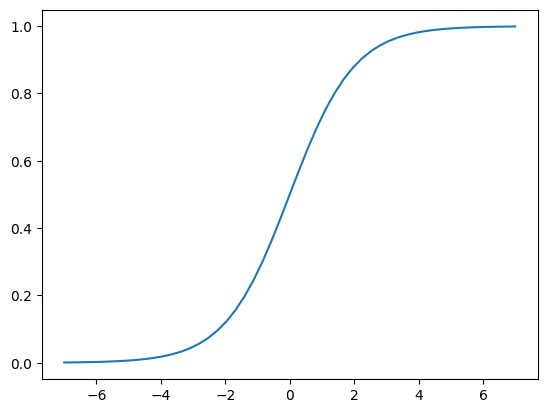

In [689]:
plt.plot(z, sigmoid(z))

In [690]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [691]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

# Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [693]:
from sklearn.linear_model import LogisticRegression

In [699]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [700]:
# THis is the BIAS term
model.intercept_[0]

-0.10903334757070299

In [697]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [702]:
# HARD predictions
model.predict(X_train)



array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
# HARD predictions
model.predict(X_train)



array([0, 1, 1, ..., 1, 0, 1])

In [723]:

# SOFT predictions
# 2 cols - first column - probability of being 0, second col is probability of being 1 (probability of churn)
model.predict_proba(X_val)

# Get only probability of churn, so we can decide on the threshold ourselves
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899601, 0.20452832, 0.21222782, ..., 0.13638515, 0.79976953,
       0.83740745])

In [724]:
churn_decision = y_pred >= 0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [727]:
# this takes the rows for which condition is True
df_val[churn_decision].customerid 


3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [728]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [730]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [733]:
# Check hjow many results match
# Model has 80 % success prediction
(y_val == churn_decision).mean()

0.8034066713981547

In [736]:
# Check hjow many results match
# Model has 80 % success prediction

# the above is actually a shortcut but this --> happens under the hood
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008996,0,0,True
1,0.204528,0,0,True
2,0.212228,0,0,True
3,0.543044,1,1,True
4,0.213789,0,0,True
...,...,...,...,...
1404,0.313666,0,0,True
1405,0.039356,0,1,False
1406,0.136385,0,0,True
1407,0.799770,1,1,True


In [737]:
df_pred.correct.mean()

0.8034066713981547

# Model interpretation
- look at coefficients
- train smaller models with fewer features

In [738]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [739]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [741]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [742]:
small = ['contract', 'tenure', 'monthlycharges']


In [744]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [746]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')


In [747]:
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)

In [748]:
X_val_small = dv_small.transform(dicts_val_small)

In [749]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [750]:

model_small.intercept_[0]

-2.4767756622431936

In [752]:
w = model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [753]:
dict(zip(dv_small.get_feature_names_out(), w))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [760]:
# using the bias term and counting the weights for an individueal customer data
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [761]:
# Underscore '_' contains the output of previous cell in Jupyter
sigmoid(_)

0.41824062315816374

#  Using the model

In [766]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient='records')
dicts_full_train[:2]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [767]:
dv = DictVectorizer(sparse=False)

In [769]:
X_full_train = dv.fit_transform(dicts_full_train)

In [770]:
y_full_train = df_full_train.churn.values

In [771]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [772]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')


In [773]:
X_test = dv.transform(dicts_test)

In [774]:
y_pred = model.predict_proba(X_test)[:, 1]

In [775]:
churn_decision = (y_pred >= 0.5)

In [776]:
# If the difference form train-> validation is small, then that's fine
# as example:  problem when train->val accuracy is 95 but on full_train -> test accuracy at 80 % 

(churn_decision == y_test).mean()

0.815471965933286

In [777]:
# how to use the model

In [778]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [780]:
X_customer = dv.transform([customer])
X_customer.shape

(1, 45)

In [785]:
model.predict_proba(X_customer)[0,1]
# 0.405 probably not going to churn


0.4056810977877974

In [786]:
# check if he actually churned or not (no)
y_test[10]

0